# **Scraping a Site**
### Extract links for all countries from the website https://starbucksmenuprices.com/.


## **Step 1: Install Necessary Libraries**
Python libraries extend the functionality of Python. Here, we need:
*   requests: To fetch the webpage.
*   BeautifulSoup (from bs4): To parse and extract data from the HTML.
*   **selenium** is used for web automation to scrape exchange rates.
*   **pandas** is used to read the consolidated latte prices CSV file.
### **Command:**

In [130]:
# pip install requests beautifulsoup4 pandas selenium matplotlib seaborn geopandas pycountry

## **Step 2: Import Libraries**
We start the Python script by importing the libraries we installed. Think of this as unlocking tools we’ll need for our task.
*   **import requests**: Enables us to send a request to a webpage.
*   **from bs4 import BeautifulSoup**: Allows us to use BeautifulSoup for extracting data.
### **Command:**

In [131]:
# Importing necessary libraries
import requests  # For fetching the webpage
from bs4 import BeautifulSoup  # For parsing the webpage

## **Step 3: Fetch the Webpage Content**
Webpages are made of HTML (a markup language for displaying content). To analyze it, we first need to download the HTML using Python.
*  **url = '...'**: This variable stores the URL of the website we want to scrape.
*  **requests.get(url)**: Sends a request to the server to get the webpage's content.
*   **response.status_code**: Checks the server's response. A code of 200 means the request was successful.

In [132]:
# URL of the webpage to scrape
url = 'https://starbucksmenuprices.com/'

# Send a request to the server
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Successfully fetched the webpage!")
else:
    print(f"Failed to fetch webpage. Status code: {response.status_code}")


Successfully fetched the webpage!


**Common Status Codes:**
*   200 OK: The request was successful.
*   201 Created: The request has been fulfilled, resulting in the creation of a new resource.
*   204 No Content: The server successfully processed the request, but is not returning any content.
*   301 Moved Permanently: The requested resource has been permanently moved to a new location.
*   302 Found (Temporary Redirect): The requested resource has been temporarily moved to a new location.
*   400 Bad Request: The server cannot or will not process the request due to an apparent client error.
*   401 Unauthorized: The request requires user authentication.
*   403 Forbidden: The server understood the request, but refuses to fulfill it.
*   404 Not Found: The server cannot find the requested resource.
*   500 Internal Server Error: The server encountered an unexpected condition that prevented it from fulfilling the request.
*   503 Service Unavailable: The server is currently unable to handle the request due to a temporary overload or maintenance.

## **Step 4: Parse the HTML Content**
Now that we have the HTML, we need to make it readable for Python using BeautifulSoup.
*  **response.text**: The raw HTML text of the webpage.
*   **BeautifulSoup(..., 'html.parser')**: Converts the raw HTML into a structured format that Python can easily work with.
*   **soup.prettify()**: Prints the HTML in an indented format, making it easier to inspect.





In [133]:
# Parse the webpage content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Print the HTML content to understand its structure
# print(soup.prettify())


## **Step 5: Locate the Links**
To extract links, inspect the website’s structure using your browser’s developer tools (right-click > "Inspect").

*   Identify the < a > tags (used for links) within the < ul > list elements.
*  **soup.find_all('ul')**: Finds all < ul > (unordered list) elements on the page.






In [134]:
# Find all <ul> elements containing the country links
sections = soup.find_all('ul')  # Locate all <ul> elements

# Lists in Python: The result is a list, which can store multiple items.
print(sections[1])

<ul class="sub-menu">
<li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-32" id="menu-item-32"><a href="https://starbucksmenuprices.com/starbucks-au-prices/">Australia</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-42" id="menu-item-42"><a href="https://starbucksmenuprices.com/starbucks-brasil-precos/">Brasil</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-70" id="menu-item-70"><a href="https://starbucksmenuprices.com/starbucks-%d1%86%d0%b5%d0%bd%d0%b8/">Bulgaria</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-58" id="menu-item-58"><a href="https://starbucksmenuprices.com/starbucks-canada-menu/">Canada</a></li>
</ul>


In [135]:
# Example of List:
my_list = ['apple', 'banana', 'cherry']
print(my_list[0],my_list[1],my_list[2])

apple banana cherry


## **Step 6: Extract Links**
Now, loop through each < ul > section to find < a > tags (anchors), which represent links.

*   **link.text.strip()**: Extracts the text (e.g., "Australia") and removes extra spaces.
*  **link.get('href')**: Retrieves the URL linked to the < a > tag.
*  **country_links.append({...})**: Adds a dictionary with country name and URL to the list.






In [136]:
# Extract links from the <ul> sections
country_links = []  # Empty list to store results

for section in sections:
    links = section.find_all('a')  # Find all <a> tags in each section
    for link in links:
        country_name = link.text.strip()  # Get the visible text of the link
        country_url = link.get('href')  # Get the href attribute (URL)
        country_links.append({'Country': country_name, 'URL': country_url})


In [137]:
# Example of Loop:
for fruit in ['apple', 'banana', 'cherry']:
    print(fruit)


apple
banana
cherry


## **Step 7: Store Results in a DataFrame**
DataFrames are tables provided by the **pandas** library, making it easy to organize and analyze data.
*   **pd.DataFrame()**: Converts a list of dictionaries into a tabular format.
*   **df.head()**: Displays the first 5 rows.



In [138]:
# Import pandas for working with data
import pandas as pd

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(country_links)

# Display the first few rows of the DataFrame
print(df.head())


     Country                                                URL
0        A-C                                                  #
1  Australia  https://starbucksmenuprices.com/starbucks-au-p...
2     Brasil  https://starbucksmenuprices.com/starbucks-bras...
3   Bulgaria  https://starbucksmenuprices.com/starbucks-%d1%...
4     Canada  https://starbucksmenuprices.com/starbucks-cana...


## **Step 8: Save Results to a CSV File**
Finally, save the data to a CSV file, which can be opened in Excel or analyzed further.
*   **to_csv()**: Exports the DataFrame to a file.
*   **index=False**: Prevents saving row numbers in the CSV.



In [139]:
# Save the DataFrame to a CSV file
df.to_csv('starbucks_country_links.csv', index=False)
print("Saved country links to starbucks_country_links.csv")


Saved country links to starbucks_country_links.csv


## **Complete Script**

In [140]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the webpage content
url = 'https://starbucksmenuprices.com/'
response = requests.get(url)
if response.status_code == 200:
    print("Successfully fetched the webpage!")
else:
    print(f"Failed to fetch webpage. Status code: {response.status_code}")

# Step 2: Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Find all <ul> elements
sections = soup.find_all('ul')

# Step 4: Extract links
country_links = []
for section in sections:
    links = section.find_all('a')
    for link in links:
        country_name = link.text.strip()
        country_url = link.get('href')
        country_links.append({'Country': country_name, 'URL': country_url})

# Step 5: Convert to DataFrame
df = pd.DataFrame(country_links)
print(df.head())  # Display the first 5 rows

# Step 6: Save to CSV
df.to_csv('starbucks_country_links.csv', index=False)
print("Saved country links to starbucks_country_links.csv")


Successfully fetched the webpage!
     Country                                                URL
0        A-C                                                  #
1  Australia  https://starbucksmenuprices.com/starbucks-au-p...
2     Brasil  https://starbucksmenuprices.com/starbucks-bras...
3   Bulgaria  https://starbucksmenuprices.com/starbucks-%d1%...
4     Canada  https://starbucksmenuprices.com/starbucks-cana...
Saved country links to starbucks_country_links.csv


# **Extracting Starbucks Prices Data**
### Example of scraping hot coffee price data.

## **Step 1: Load the Links**
*   **pd.read_csv()**: Reads the CSV file containing country links into a DataFrame.
*   **links_file**: The file path of the CSV file.



In [141]:
links_file = 'starbucks_country_links.csv'  # File containing country links
country_links = pd.read_csv(links_file)  # Read the CSV file into a DataFrame

## **Step 2: Filter Valid Links**
*   **Filter Rows**: ~country_links['URL'].str.contains('#', na=False) excludes rows where the URL contains #.
*   **iloc[0]**: Selects the first valid row.
*   **Format Country Name**: Converts the country name to lowercase and replaces spaces with hyphens for file naming.

In [142]:
valid_links = country_links[~country_links['URL'].str.contains('#', na=False)]  # Filter rows without '#'
if valid_links.empty:
    print("No valid links found in the file.")
    exit()

first_link = valid_links.iloc[0]  # Select the first valid row
country_url = first_link['URL']  # Extract the URL from the first valid row
country_name = first_link['Country'].lower().replace(' ', '-')  # Extract and format the country name


## **Step 3: Fetch the Webpage**
*   **requests.get(url)**: Fetches the HTML content of the URL.
*   **Check Status Code**: Ensures the webpage was successfully fetched (200 status code).






In [143]:
response = requests.get(country_url)
if response.status_code == 200:
    print(f"Successfully fetched the page: {country_url}")
else:
    print(f"Failed to fetch webpage. Status code: {response.status_code}")
    exit()

Successfully fetched the page: https://starbucksmenuprices.com/starbucks-au-prices/


## **Step 4: Parse the HTML**
*   **BeautifulSoup(..., 'html.parser')**: Parses the HTML content into a structured format.

In [144]:
soup = BeautifulSoup(response.text, 'html.parser')

## **Step 5: Locate "h2" Section**
*   **Find < h2 > Heading**: Searches for the "h2" heading.
*   **Find Parent Table**: If the heading is found, locate the parent table containing the data.

In [145]:
starbucks_prices_heading = soup.find('h2')  # Locate the "h2" section heading
if starbucks_prices_heading:
    starbucks_prices_table = starbucks_prices_heading.find_parent('table')  # Find the parent table containing the data
else:
    print("'Hot Coffee' section not found on the page.")
    exit()

## **Step 6: Extract Data**
*   **Find Rows**: Selects rows with class item.
*  **Extract Columns**: Extracts text from each column and cleans it.

In [146]:
starbucks_prices_data = []  # List to store extracted data
if starbucks_prices_table:
    rows = starbucks_prices_table.find_all('tr', class_='item')  # Find all rows with class "item"
    for row in rows:
        cols = row.find_all('td')  # Find all columns in the row
        cols = [col.string.strip() for col in cols]  # Clean the text
        if cols:  # Skip empty rows
            starbucks_prices_data.append(cols)

## **Step 7: Save Data**
*   **Dynamic File Name**: Includes the country name in the file name.
*  **Save to CSV**: Exports the data to a CSV file.

In [147]:
if starbucks_prices_data:
    df_starbucks_prices= pd.DataFrame(starbucks_prices_data, columns=['Item', 'Price'])  # Create a DataFrame
    output_file = f'starbucks_prices_{country_name}.csv'  # Generate file name with country name
    df_starbucks_prices.to_csv(output_file, index=False)  # Save to CSV
    print(f"Saved 'Starbucks Prices' prices to {output_file}")
    print(df_starbucks_prices)  # Print the result
else:
    print("No 'Starbucks Prices Data' data found.")


Saved 'Starbucks Prices' prices to starbucks_prices_australia.csv
                              Item  Price
0                     Banana Bread  $6.30
1                 Butter Croissant  $5.78
2                 Almond Croissant  $5.78
3                Pain Au Chocolate  $5.50
4                 Pain Au Chocolat  $6.00
..                             ...    ...
74               Caramel Macchiato  $6.88
75           White Chocolate Mocha  $6.16
76                     Caffé Mocha  $6.35
77         Caramel Cloud Macchiato  $8.00
78  Honeycomb Salted Caramel Latte  $7.30

[79 rows x 2 columns]


## **Complete Script**

In [148]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os

# Step 1: Load the Links
links_file = 'starbucks_country_links.csv'  # File containing country links
country_links = pd.read_csv(links_file)  # Read the CSV file into a DataFrame

# Step 2: Filter Valid Links
valid_links = country_links[~country_links['URL'].str.contains('#', na=False)]  # Remove invalid URLs containing '#'

# Check if there are any valid links
if valid_links.empty:
    print("No valid links found in the file.")
    exit()

# Step 3: Loop Over All Valid Links
for index, row in valid_links.iterrows():
    country_url = row['URL']  # Extract the URL
    country_name = row['Country'].lower().replace(' ', '-')  # Format the country name for the file name

    print(f"Fetching data for {country_name} from {country_url}...")

    # Step 4: Fetch the Webpage Content
    response = requests.get(country_url)
    if response.status_code == 200:
        print(f"Successfully fetched the page: {country_url}")
    else:
        print(f"Failed to fetch webpage for {country_name}. Status code: {response.status_code}")
        continue  # Skip this country if the webpage request fails

    # Step 5: Parse the HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Step 6: Locate "h2" Section Containing Starbucks Prices
    starbucks_prices_heading = soup.find('h2')  # Locate the "h2" section heading
    if starbucks_prices_heading:
        starbucks_prices_table = starbucks_prices_heading.find_parent('table')  # Find the parent table containing the data
    else:
        print(f"'Hot Coffee' section not found for {country_name}. Skipping...")
        continue  # Skip to the next country if no relevant section is found

    # Step 7: Extract Data
    starbucks_prices_data = []  # List to store extracted data
    if starbucks_prices_table:
        rows = starbucks_prices_table.find_all('tr', class_='item')  # Find all rows with class "item"
        for row in rows:
            cols = row.find_all('td')  # Find all columns in the row
            cols = [col.string.strip() if col.string else '' for col in cols]  # Clean the text and handle missing values
            if cols:  # Skip empty rows
                starbucks_prices_data.append(cols)

    # Step 8: Save Data
    if starbucks_prices_data:
        df_starbucks_prices = pd.DataFrame(starbucks_prices_data, columns=['Item', 'Price'])  # Create a DataFrame
        output_file = f'starbucks_prices_{country_name}.csv'  # Generate file name with country name
        df_starbucks_prices.to_csv(output_file, index=False)  # Save to CSV
        print(f"Saved 'Starbucks Prices' prices to {output_file}")
    else:
        print(f"No 'Starbucks Prices Data' found for {country_name}. Skipping...")

Fetching data for australia from https://starbucksmenuprices.com/starbucks-au-prices/...
Successfully fetched the page: https://starbucksmenuprices.com/starbucks-au-prices/
Saved 'Starbucks Prices' prices to starbucks_prices_australia.csv
Fetching data for brasil from https://starbucksmenuprices.com/starbucks-brasil-precos/...
Successfully fetched the page: https://starbucksmenuprices.com/starbucks-brasil-precos/
Saved 'Starbucks Prices' prices to starbucks_prices_brasil.csv
Fetching data for bulgaria from https://starbucksmenuprices.com/starbucks-%d1%86%d0%b5%d0%bd%d0%b8/...
Successfully fetched the page: https://starbucksmenuprices.com/starbucks-%d1%86%d0%b5%d0%bd%d0%b8/
Saved 'Starbucks Prices' prices to starbucks_prices_bulgaria.csv
Fetching data for canada from https://starbucksmenuprices.com/starbucks-canada-menu/...
Successfully fetched the page: https://starbucksmenuprices.com/starbucks-canada-menu/
Saved 'Starbucks Prices' prices to starbucks_prices_canada.csv
Fetching data fo

# Consolidating Latte Prices from Country CSV Files

## **Step 1: Import Libraries**
*  **os** is used for interacting with the file system (e.g., listing files in a folder).
*  **pandas** is used to read and manipulate CSV files.

In [149]:
import os
import pandas as pd

## **Step 2: Define Folder Path**
*  Specify the folder where all the country-specific CSV files are located.

In [150]:
folder_path = './'  # Adjust to the directory where the files are stored

## **Step 3: Initialize Data Storage**
*  Create an empty list, **worldwide_latte_prices**, to store the results.

In [151]:
worldwide_latte_prices = []

## **Step 4: Loop Through Files, Read Each File, and Search for "Latte":**
*  Identify files that match the naming pattern: **starbucks_prices_[country].csv.**
*  Extract the country name from the file name.
*  Use **pandas** to load the CSV file into a DataFrame.
* Iterate through the rows of the DataFrame to find an item containing "latte".
*  Extract the corresponding price.

In [152]:
# Step 4: Loop through files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file matches the pattern "starbucks_prices_[country].csv"
    if file_name.startswith('starbucks_prices_') and file_name.endswith('.csv'):
        # Extract the country name from the file name
        country_name = file_name.replace('starbucks_prices_', '').replace('.csv', '').capitalize()
        
        # Load the CSV file into a DataFrame
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        # Step 5: Search for a row containing 'Latte'
        for _, row in df.iterrows():
            if 'latte' in row['Item'].lower():  # Case-insensitive search for "latte"
                latte_price = row['Price']
                # Append the country name and latte price to the list
                worldwide_latte_prices.append({'Country': country_name, 'Latte Price': latte_price})
                break  # Stop after finding the first matching "latte"

## **Step 7: Save the Data:**
*  onsolidate the extracted data into a new CSV file named **worldwide_latte_prices.csv.**

In [153]:
# Save the consolidated data to a new CSV file
output_file = 'worldwide_latte_prices.csv'
df_worldwide = pd.DataFrame(worldwide_latte_prices)
df_worldwide.to_csv(output_file, index=False)

print(f"Worldwide latte prices saved to {output_file}")
print(df_worldwide)

Worldwide latte prices saved to worldwide_latte_prices.csv
           Country Latte Price
0            Italy       €1.50
1   Czech-republic    Kč165.00
2           Brazil     R$16.86
3            Chile  $11,684.62
4           México      $92.41
5          Hungary  Ft2,190.00
6     South-africa      R48.00
7           Poland     zł10.90
8        Australia       $6.88
9    United-states       $5.03
10          Brasil     R$16.86
11         Finland       €6.20
12        Colombia  $27,400.00
13          Canada      $10.35
14  United-kingdom       £3.36


## **Complete Script**

In [154]:
import os
import pandas as pd

# Step 1: Define the folder path containing the CSV files
folder_path = './'  # Adjust to the directory where the files are stored

# Step 2: Initialize a list to store latte prices data
worldwide_latte_prices = []

# Step 3: Loop through files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file matches the pattern "starbucks_prices_[country].csv"
    if file_name.startswith('starbucks_prices_') and file_name.endswith('.csv'):
        # Extract the country name from the file name
        country_name = file_name.replace('starbucks_prices_', '').replace('.csv', '').capitalize()
        
        # Load the CSV file into a DataFrame
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        # Step 4: Search for a row containing 'Latte'
        for _, row in df.iterrows():
            if 'latte' in row['Item'].lower():  # Case-insensitive search for "latte"
                latte_price = row['Price']
                # Append the country name and latte price to the list
                worldwide_latte_prices.append({'Country': country_name, 'Latte Price': latte_price})
                break  # Stop after finding the first matching "latte"

# Step 5: Save the consolidated data to a new CSV file
output_file = 'worldwide_latte_prices.csv'
df_worldwide = pd.DataFrame(worldwide_latte_prices)
df_worldwide.to_csv(output_file, index=False)

print(f"Worldwide latte prices saved to {output_file}")
print(df_worldwide)


Worldwide latte prices saved to worldwide_latte_prices.csv
           Country Latte Price
0            Italy       €1.50
1   Czech-republic    Kč165.00
2           Brazil     R$16.86
3            Chile  $11,684.62
4           México      $92.41
5          Hungary  Ft2,190.00
6     South-africa      R48.00
7           Poland     zł10.90
8        Australia       $6.88
9    United-states       $5.03
10          Brasil     R$16.86
11         Finland       €6.20
12        Colombia  $27,400.00
13          Canada      $10.35
14  United-kingdom       £3.36


## Clean Country Name

In [155]:
import pandas as pd
import pycountry

# Step 1: Load Data
file_path = "worldwide_latte_prices.csv"  # Change this to your actual file name
df = pd.read_csv(file_path)

# Step 2: Function to Standardize Country Names
def standardize_country_name(country):
    try:
        # Convert country name to lowercase and remove leading/trailing spaces
        country = country.strip().lower()
        
        # Handle common non-standard names manually
        country_corrections = {
            "czech-republic": "Czech Republic",
            "south-africa": "South Africa",
            "united-states": "United States",
            "united-kingdom": "United Kingdom",
            "méxico": "Mexico",
            "brasil": "Brazil",
            "italy": "Italy",
            "hungary": "Hungary",
            "finland": "Finland",
            "colombia": "Colombia",
            "canada": "Canada",
            "poland": "Poland",
            "australia": "Australia",
            "chile": "Chile"
        }

        # Check for manual corrections first
        if country in country_corrections:
            return country_corrections[country]

        # Use pycountry to get standard country names
        country_obj = pycountry.countries.lookup(country)
        return country_obj.name  # Return the official English name

    except LookupError:
        return country  # If no match is found, return the original name

# Step 3: Apply the function to the "Country" column
df["Country"] = df["Country"].apply(standardize_country_name)

# Step 4: Remove Duplicates (if any)
df = df.drop_duplicates()

# Step 5: Save the cleaned file
output_file = "latte_prices_standardized.csv"
df.to_csv(output_file, index=False)

print(f"✅ Standardized country names saved to {output_file}")

✅ Standardized country names saved to latte_prices_standardized.csv


# Fetch Exchange Rates for Each Country

## **Step 1: Import Libraries:**

In [156]:
# Import necessary libraries
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

## **Step 2: Load Latte Prices Data:**
*  Read the CSV file **worldwide_latte_prices.csv** created by the first script.

In [157]:
# Load country data from the CSV file
csv_file = 'latte_prices_standardized.csv'  # Replace with your CSV file name
countries = pd.read_csv(csv_file)

## **Step 3: Set Up Selenium:**
*  Initialize the Selenium WebDriver for automated web browsing.

In [158]:
# Set up Selenium WebDriver
driver = webdriver.Chrome()  # Ensure ChromeDriver is properly set up

## **Step 4: Define Exchange Rate Function:**
*  Create a function to search for exchange rates on DuckDuckGo.
*  Open DuckDuckGo, enter the search query, and retrieve the exchange rate.

In [159]:
# Function to get exchange rate from DuckDuckGo
def get_exchange_rate_from_duckduckgo(country_name):
    try:
        # Open DuckDuckGo
        driver.get("https://duckduckgo.com/")

        # Locate and enter search query in search box
        search_box = driver.find_element(By.NAME, "q")
        search_box.clear()
        search_box.send_keys(f"1 USD to {country_name} exchange rate")
        search_box.send_keys(Keys.RETURN)

        # Wait for results to load
        time.sleep(3)

        # Locate dynamic exchange rate result
        rate_elements = driver.find_elements(By.CSS_SELECTOR, 'input[aria-label*="Currency"]')

        # If exchange rate input exists, extract value
        if rate_elements:
            exchange_rate = rate_elements[-1].get_attribute("value")  # Extract last input field
            return exchange_rate
        else:
            print(f"No exchange rate found for {country_name}")
            return None

    except Exception as e:
        print(f"Error fetching exchange rate for {country_name}: {e}")
        return None

## **Step 5: Loop Through Countries:**
*  For each country in the CSV, fetch the exchange rate using the defined function.

In [160]:
# Loop through each country and fetch exchange rates
exchange_rates = []
for _, row in countries.iterrows():
    country_name = row['Country']
    print(f"Fetching exchange rate for {country_name}...")
    rate = get_exchange_rate_from_duckduckgo(country_name)
    exchange_rates.append({'Country': country_name, 'Exchange Rate': rate})

Fetching exchange rate for Italy...
Fetching exchange rate for Czech Republic...
Fetching exchange rate for Brazil...
Fetching exchange rate for Chile...
Fetching exchange rate for Mexico...
Fetching exchange rate for Hungary...
Fetching exchange rate for South Africa...
Fetching exchange rate for Poland...
Fetching exchange rate for Australia...
Fetching exchange rate for United States...
No exchange rate found for United States
Fetching exchange rate for Finland...
Fetching exchange rate for Colombia...
Fetching exchange rate for Canada...
Fetching exchange rate for United Kingdom...


## **Step 6: Save the Exchange Rates:**
*  Store the results in a new CSV file named **exchange_rates_duckduckgo.csv.**

In [161]:
# Step 4: Save the results to a new CSV file
df_exchange_rates = pd.DataFrame(exchange_rates)
output_file = 'exchange_rates_duckduckgo.csv'
df_exchange_rates.to_csv(output_file, index=False)
print(f"Saved exchange rates to {output_file}")

Saved exchange rates to exchange_rates_duckduckgo.csv


## **Step 7: Close Selenium:**
*  Shut down the WebDriver after completing the scraping task.

In [162]:
# Close the Selenium WebDriver
driver.quit()

## **Complete Script**

In [163]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

# Step 1: Load country data
csv_file = 'latte_prices_standardized.csv'  # Ensure the correct file name
countries = pd.read_csv(csv_file)

# Set up Selenium WebDriver
driver = webdriver.Chrome()  # Ensure you have ChromeDriver installed

# Function to get exchange rate from DuckDuckGo
def get_exchange_rate_from_duckduckgo(country_name):
    try:
        # Open DuckDuckGo
        driver.get("https://duckduckgo.com/")

        # Locate and enter search query in search box
        search_box = driver.find_element(By.NAME, "q")
        search_box.clear()
        search_box.send_keys(f"1 USD to {country_name} exchange rate")
        search_box.send_keys(Keys.RETURN)

        # Wait for results to load
        time.sleep(3)

        # Locate dynamic exchange rate result
        rate_elements = driver.find_elements(By.CSS_SELECTOR, 'input[aria-label*="Currency"]')

        # If exchange rate input exists, extract value
        if rate_elements:
            exchange_rate = rate_elements[-1].get_attribute("value")  # Extract last input field
            return exchange_rate
        else:
            print(f"No exchange rate found for {country_name}")
            return None

    except Exception as e:
        print(f"Error fetching exchange rate for {country_name}: {e}")
        return None

# Loop through each country and fetch exchange rates
exchange_rates = []
for _, row in countries.iterrows():
    country_name = row['Country']
    print(f"Fetching exchange rate for {country_name}...")
    rate = get_exchange_rate_from_duckduckgo(country_name)
    exchange_rates.append({'Country': country_name, 'Exchange Rate': rate})

# Save results to CSV
df_exchange_rates = pd.DataFrame(exchange_rates)
output_file = 'exchange_rates_duckduckgo.csv'
df_exchange_rates.to_csv(output_file, index=False)
print(f"Exchange rates saved to {output_file}")

# Close Selenium WebDriver
driver.quit()

Fetching exchange rate for Italy...
Fetching exchange rate for Czech Republic...
Fetching exchange rate for Brazil...
Fetching exchange rate for Chile...
Fetching exchange rate for Mexico...
Fetching exchange rate for Hungary...
Fetching exchange rate for South Africa...
Fetching exchange rate for Poland...
Fetching exchange rate for Australia...
Fetching exchange rate for United States...
No exchange rate found for United States
Fetching exchange rate for Finland...
Fetching exchange rate for Colombia...
Fetching exchange rate for Canada...
Fetching exchange rate for United Kingdom...
Exchange rates saved to exchange_rates_duckduckgo.csv


# Starbucks Index

In [164]:
import pandas as pd
import re

# Step 1: Load CSV Files
exchange_rates_file = 'exchange_rates_duckduckgo.csv'  # Market exchange rates
latte_prices_file = 'latte_prices_standardized.csv'      # Starbucks latte prices

df_exchange = pd.read_csv(exchange_rates_file)  # Read exchange rate data
df_latte = pd.read_csv(latte_prices_file)       # Read Starbucks prices data

# Step 2: Standardize Country Names (Lowercase, Strip Spaces)
df_latte['Country'] = df_latte['Country'].str.strip().str.lower()
df_exchange['Country'] = df_exchange['Country'].str.strip().str.lower()

# Step 3: Clean Latte Prices (Remove Currency Symbols and Convert to Float)
def clean_price(price):
    if isinstance(price, str):
        price = re.sub(r'[^\d.]', '', price)  # Keep only numbers and decimal point
    try:
        return float(price)
    except ValueError:
        return None  # Handle cases where conversion fails

df_latte['Latte Price'] = df_latte['Latte Price'].apply(clean_price)
df_exchange['Exchange Rate'] = df_exchange['Exchange Rate'].apply(clean_price)

# Step 4: Set USA Default Values if Missing
usa_latte_price = df_latte[df_latte['Country'] == 'united-states']['Latte Price']
usa_latte_price = usa_latte_price.values[0] if not usa_latte_price.empty else 4.68  # Default Latte Price

# Ensure USA exchange rate is 1.0
df_exchange.loc[df_exchange['Country'] == 'united-states', 'Exchange Rate'] = 1.0

# Step 5: Perform an OUTER Merge to Ensure No Countries Are Dropped
df_combined = pd.merge(df_latte, df_exchange, on='Country', how='outer')

# Step 6: Identify Missing Data
missing_prices = df_combined[df_combined['Latte Price'].isna()]
missing_rates = df_combined[df_combined['Exchange Rate'].isna()]

if not missing_prices.empty:
    print("⚠️ Missing Latte Prices for:")
    print(missing_prices[['Country']])

if not missing_rates.empty:
    print("⚠️ Missing Exchange Rates for:")
    print(missing_rates[['Country']])

# Step 7: Fill Missing Exchange Rates with Placeholder (-1 for Debugging)
df_combined['Exchange Rate'] = df_combined['Exchange Rate'].fillna(1)

# Step 8: Drop Countries Where Latte Price Is Missing
df_combined = df_combined.dropna(subset=['Latte Price'])

# Step 9: Calculate Starbucks Index (PPP Exchange Rate)
df_combined['PPP Exchange Rate (USD)'] = df_combined['Latte Price'] / usa_latte_price

# Step 10: Compare with Market Exchange Rate
def evaluate_currency(row):
    if row["Exchange Rate"] == -1:  # Missing data case
        return "Missing Exchange Rate"
    elif row["PPP Exchange Rate (USD)"] < row["Exchange Rate"]:
        return "Undervalued"
    elif row["PPP Exchange Rate (USD)"] > row["Exchange Rate"]:
        return "Overvalued"
    else:
        return "Neutral"

df_combined['Currency Valuation'] = df_combined.apply(evaluate_currency, axis=1)

# Step 11: Remove Duplicates
df_combined = df_combined.drop_duplicates()

# Step 12: Save the Final Starbucks Index File
output_file = 'starbucks_index.csv'
df_combined.to_csv(output_file, index=False)

# Step 13: Print Final DataFrame
print(df_combined)
print(f"✅ Starbucks Index saved to {output_file}")

⚠️ Missing Exchange Rates for:
          Country
13  united states
           Country  Latte Price  Exchange Rate  PPP Exchange Rate (USD)  \
0        australia         6.88           1.57                 1.470085   
1           brazil        16.86           5.69                 3.602564   
2           canada        10.35           1.42                 2.211538   
3            chile     11684.62         949.44              2496.713675   
4         colombia     27400.00        4094.95              5854.700855   
5   czech republic       165.00          23.99                35.256410   
6          finland         6.20           0.96                 1.324786   
7          hungary      2190.00         383.52               467.948718   
8            italy         1.50           0.96                 0.320513   
9           mexico        92.41          20.26                19.745726   
10          poland        10.90           3.97                 2.329060   
11    south africa        48.00  

In [165]:
import pandas as pd
import requests

# Step 1: Download the Big Mac Index Data (CSV format)
big_mac_url = "https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-full-index.csv"
big_mac_file = "big-mac-full-index.csv"

response = requests.get(big_mac_url)
if response.status_code == 200:
    with open(big_mac_file, 'wb') as file:
        file.write(response.content)
    print(f"Successfully downloaded {big_mac_file}")
else:
    print("Failed to download Big Mac data.")
    exit()

# Step 2: Load Starbucks Index Data
starbucks_file = "starbucks_index.csv"  # Ensure this file exists in the root folder
df_starbucks = pd.read_csv(starbucks_file)

# Step 3: Load Big Mac Index Data
df_big_mac = pd.read_csv(big_mac_file)

# Step 4: Standardize Country Names for Merging
df_starbucks['Country'] = df_starbucks['Country'].str.lower().str.strip()
df_big_mac['name'] = df_big_mac['name'].str.lower().str.strip()

# Step 5: Remove duplicates in both datasets
df_starbucks = df_starbucks.drop_duplicates(subset=['Country'])
df_big_mac = df_big_mac.drop_duplicates(subset=['name'])

# Step 6: Convert relevant columns to numeric values (removing currency symbols)
df_starbucks['PPP Exchange Rate (USD)'] = pd.to_numeric(df_starbucks['PPP Exchange Rate (USD)'], errors='coerce')
df_big_mac['dollar_price'] = pd.to_numeric(df_big_mac['dollar_price'], errors='coerce')

# Step 7: Merge on Country Name
df_merged = pd.merge(df_starbucks, df_big_mac[['name', 'dollar_price']], left_on='Country', right_on='name', how='inner')

# Step 8: Compare Starbucks PPP with Big Mac PPP
df_merged['Higher PPP'] = df_merged.apply(
    lambda row: 'Starbucks' if row['PPP Exchange Rate (USD)'] > row['dollar_price'] else 'Big Mac', axis=1
)

# Step 9: Remove the extra 'name' column after merging
df_merged = df_merged.drop(columns=['name'])

# Step 10: Save and Display the Results
output_file = "starbucks_vs_bigmac.csv"
df_merged.to_csv(output_file, index=False)

print(f"Comparison saved to {output_file}")

Successfully downloaded big-mac-full-index.csv
Comparison saved to starbucks_vs_bigmac.csv


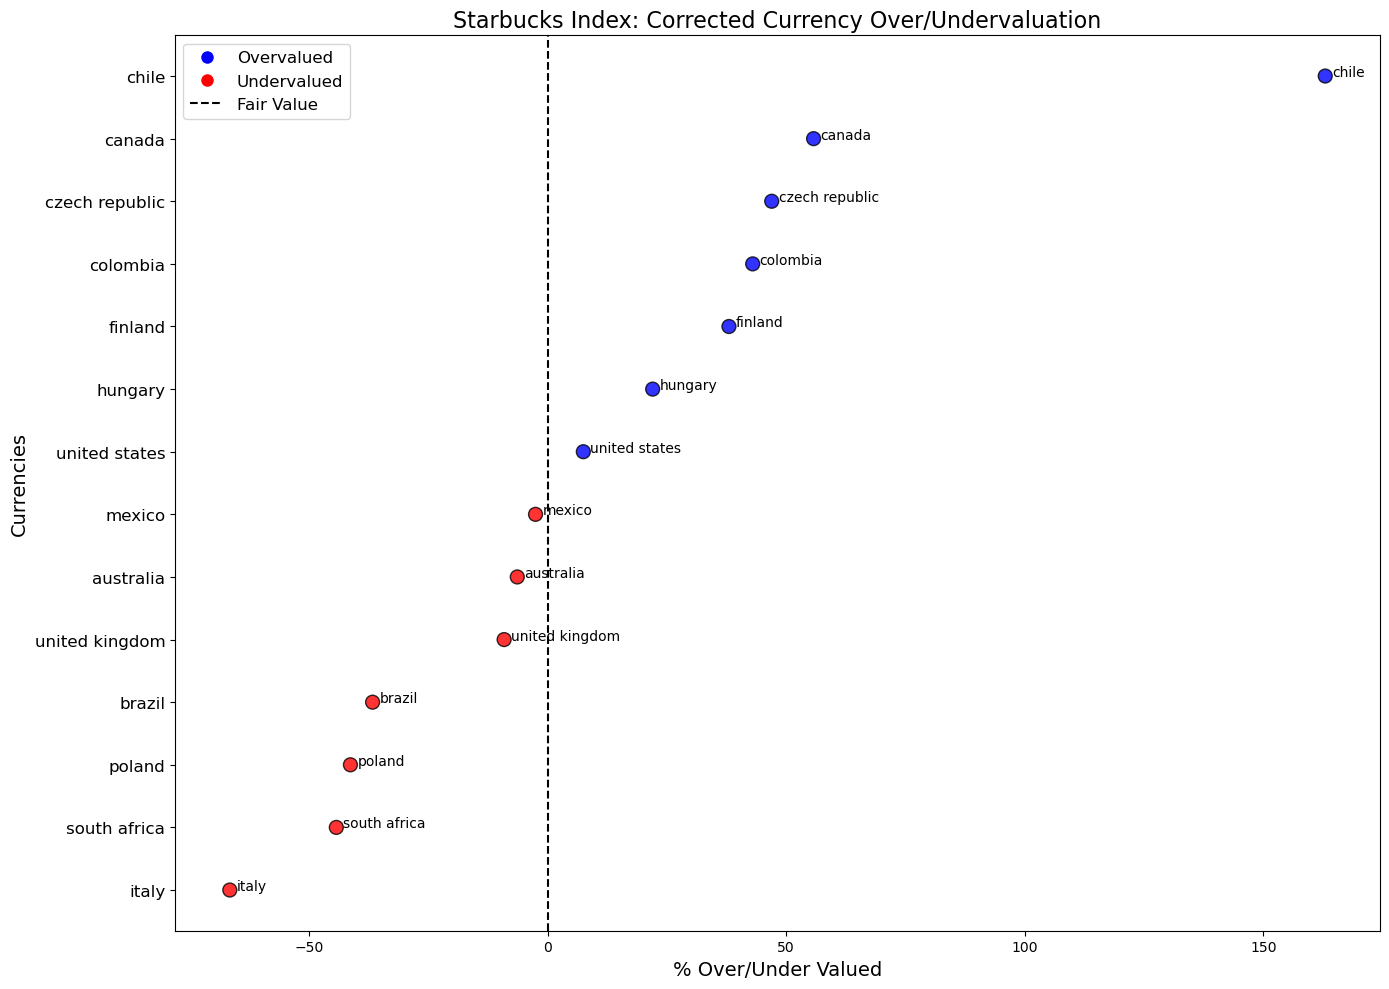

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Starbucks Index Data
file_path = "starbucks_index.csv"
df = pd.read_csv(file_path)

# Step 2: Convert columns to numeric (force errors to NaN)
df["PPP Exchange Rate (USD)"] = pd.to_numeric(df["PPP Exchange Rate (USD)"], errors="coerce")
df["Exchange Rate"] = pd.to_numeric(df["Exchange Rate"], errors="coerce")

# Step 3: Fix Currency Valuation Calculation (Corrected Logic)
df["Valuation %"] = ((df["PPP Exchange Rate (USD)"] - df["Exchange Rate"]) / df["Exchange Rate"]) * 100

# Step 4: **Fix Overvalued vs. Undervalued Logic**
def classify_currency(row):
    if row["PPP Exchange Rate (USD)"] < row["Exchange Rate"]:
        return "Undervalued"  # Currency is **cheaper** than expected
    elif row["PPP Exchange Rate (USD)"] > row["Exchange Rate"]:
        return "Overvalued"  # Currency is **more expensive** than expected
    else:
        return "Neutral"

df["Currency Valuation"] = df.apply(classify_currency, axis=1)

# Step 5: Sort for Better Visualization
df_sorted = df.sort_values(by="Valuation %", ascending=True)

# Step 6: Define Colors for Visualization
df_sorted["Color"] = df_sorted["Currency Valuation"].apply(lambda x: "red" if x == "Undervalued" else "blue")

# Step 7: Create Scatter Plot
fig, ax = plt.subplots(figsize=(14, 10))
scatter = ax.scatter(df_sorted["Valuation %"], range(len(df_sorted)), 
           c=df_sorted["Color"], alpha=0.8, edgecolors="black", linewidths=1, s=100, label="Currency Valuation")

# Step 8: Adjust Y-axis Labels to Display All Country Names
ax.set_yticks(range(len(df_sorted)))
ax.set_yticklabels(df_sorted["Country"], fontsize=12, ha="right")

# Step 9: Add Country Annotations Next to Each Point
for i, txt in enumerate(df_sorted["Country"]):
    ax.annotate(txt, (df_sorted["Valuation %"].iloc[i], i), 
                textcoords="offset points", xytext=(5, 0), ha="left", fontsize=10)

# Step 10: Add Vertical Line for Neutral Valuation (0%)
ax.axvline(x=0, color="black", linestyle="--", linewidth=1.5, label="Fair Value")

# Step 11: Add a Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Overvalued', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Undervalued', markerfacecolor='red', markersize=10),
           plt.Line2D([0], [0], color="black", linestyle="--", linewidth=1.5, label="Fair Value")]

ax.legend(handles=handles, loc="upper left", fontsize=12)

# Step 12: Format Chart
ax.set_xlabel("% Over/Under Valued", fontsize=14)
ax.set_ylabel("Currencies", fontsize=14)
ax.set_title("Starbucks Index: Corrected Currency Over/Undervaluation", fontsize=16)

# Step 13: Show the Graph
plt.tight_layout()
plt.show()

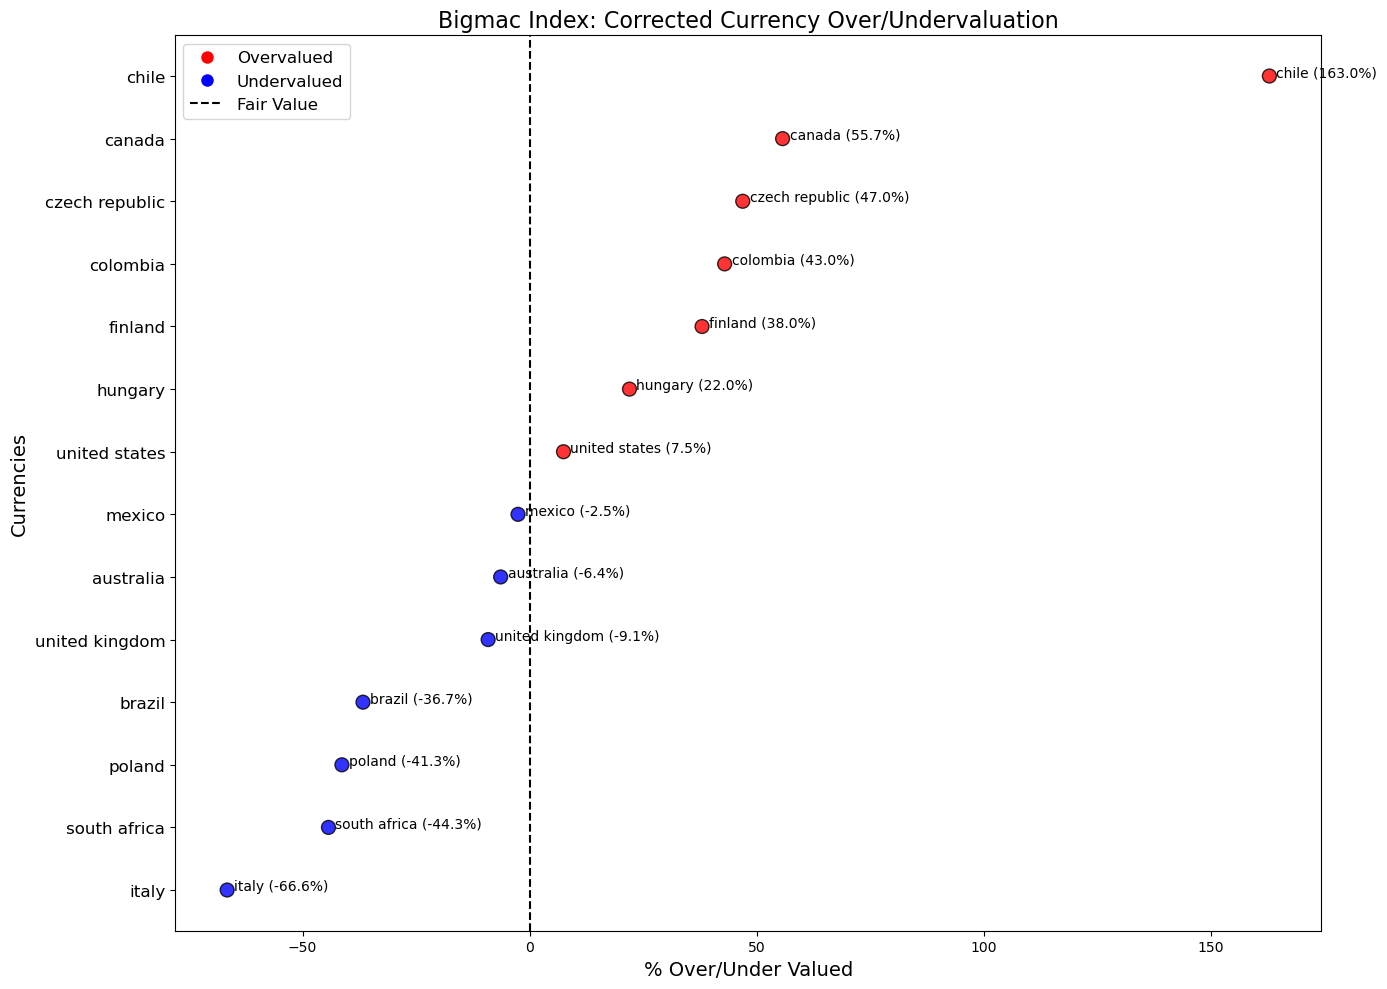

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Starbucks Index Data
file_path = "starbucks_index.csv"
df = pd.read_csv(file_path)

# Step 2: Convert columns to numeric (force errors to NaN)
df["PPP Exchange Rate (USD)"] = pd.to_numeric(df["PPP Exchange Rate (USD)"], errors="coerce")
df["Exchange Rate"] = pd.to_numeric(df["Exchange Rate"], errors="coerce")

# Step 3: Fix Currency Valuation Calculation (Corrected Logic)
df["Valuation %"] = ((df["PPP Exchange Rate (USD)"] - df["Exchange Rate"]) / df["Exchange Rate"]) * 100

# Step 4: **Fix Overvalued vs. Undervalued Logic**
def classify_currency(row):
    if row["PPP Exchange Rate (USD)"] < row["Exchange Rate"]:
        return "Undervalued"  # Currency is **cheaper** than expected
    elif row["PPP Exchange Rate (USD)"] > row["Exchange Rate"]:
        return "Overvalued"  # Currency is **more expensive** than expected
    else:
        return "Neutral"

df["Currency Valuation"] = df.apply(classify_currency, axis=1)

# Step 5: Sort for Better Visualization
df_sorted = df.sort_values(by="Valuation %", ascending=True)

# Step 6: Define Colors for Visualization
df_sorted["Color"] = df_sorted["Currency Valuation"].apply(lambda x: "blue" if x == "Undervalued" else "red")

# Step 7: Create Scatter Plot
fig, ax = plt.subplots(figsize=(14, 10))
scatter = ax.scatter(df_sorted["Valuation %"], range(len(df_sorted)), 
           c=df_sorted["Color"], alpha=0.8, edgecolors="black", linewidths=1, s=100, label="Currency Valuation")

# Step 8: Adjust Y-axis Labels to Display All Country Names
ax.set_yticks(range(len(df_sorted)))
ax.set_yticklabels(df_sorted["Country"], fontsize=12, ha="right")

# Step 9: Add Country Annotations with **Percentage Values**
for i, txt in enumerate(df_sorted["Country"]):
    percentage = round(df_sorted["Valuation %"].iloc[i], 1)  # Round percentage to 1 decimal place
    ax.annotate(f"{txt} ({percentage}%)", 
                (df_sorted["Valuation %"].iloc[i], i), 
                textcoords="offset points", xytext=(5, 0), ha="left", fontsize=10)

# Step 10: Add Vertical Line for Neutral Valuation (0%)
ax.axvline(x=0, color="black", linestyle="--", linewidth=1.5, label="Fair Value")

# Step 11: Add a Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Overvalued', markerfacecolor='red', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Undervalued', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], color="black", linestyle="--", linewidth=1.5, label="Fair Value")]

ax.legend(handles=handles, loc="upper left", fontsize=12)

# Step 12: Format Chart
ax.set_xlabel("% Over/Under Valued", fontsize=14)
ax.set_ylabel("Currencies", fontsize=14)
ax.set_title("Starbucks Index: Corrected Currency Over/Undervaluation", fontsize=16)

# Step 13: Show the Graph
plt.tight_layout()
plt.show()



According to the Starbucks index the Czech republic, United States, Hungary, Colombia, Canada, Chile and Finland are all overvalued, whereas the rest of the surveyed nations are undervalued.

The starbucks latte index can be used as a tool to evaluate exchange rate disparities, as it represents the actual cost of a uniform good across many nations. As such, it offers a view of how valuable a certain currency is without the impact of macroeconomic factors which can impact exchange rates such as trade balances between nations and speculation.

The bigmac index shows somewhat similar results, but notably assesses all nations except for Australia and the United States as having lower PPPs.

Usage of the bigmac index or starbucks index clearly has a large effect on the analysis being done, as the bigmac index will tend to estimate lower PPP figures for certain nations. Moreover, neither of these indices are likely good estimates price level, as they are quite volatile since they rely on single items.

The Starbucks index and Bigmac index are both very roughly in line the actual exchange rates and PPP exchange rates but very notably differ in a number of cases. For instance, Chile and Italy both have index values that are not at all in line with their exchange rates.

The insight derived from the Starbucks index is likely less reliable than that of the bigmac index, as the values in the Starbucks index differ from the PPP by larger amounts.

The methodology used in this analysis could be improved in the future by creating an index representing the price level of many disparate items (as is done in PPP) rather than a single item like a Latte or Big Mac which is not an entirely reliable indicator. 

Exchange rates effect local businesses, as any business that relies on trade from other nations or does financial transactions (like loan payments) in a foreign currency will be significantly impacted by a sudden increase or decrease in currency valuation relative to another currency. Since currency valuation shifts can greatly disrupt businesses, businesses also must factor in the increased risk of operations caused by the threat of disruption, which likely decreases business activity.

